# Step#1: Import packages and Read the dataset

In [ ]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
import plotly
import plotly.express as px
from pandas.io.json import json_normalize
import math
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('riyadh_resturants_clean.csv')
df.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,NaN,NaN
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,NaN,NaN
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,NaN,NaN
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,NaN,NaN
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0


# Step#2: Look at the data

In [ ]:
print('Number of columns: ', df.shape[1])
print('Number of rows: ', df.shape[0])

Number of columns:  11
Number of rows:  19361


In [ ]:
df.describe()

,lat,lng,likes,photos,tips,rating,ratingSignals
count,19361.000000,19361.000000,19359.000000,19361.000000,19361.000000,7949.000000,7949.000000
mean,24.722588,46.697338,63.609639,167.775735,17.090853,7.536231,201.637313
std,0.082220,0.074112,291.028125,985.424550,75.456881,0.942969,552.225144
min,24.469683,46.272777,0.000000,0.000000,0.000000,4.400000,0.000000
25%,24.674721,46.643255,0.000000,1.000000,0.000000,6.900000,14.000000
50%,24.737781,46.693637,3.000000,4.000000,1.000000,7.600000,38.000000
75%,24.784026,46.753452,17.000000,24.000000,5.000000,8.200000,143.000000
max,24.943424,46.940912,9984.000000,26332.000000,2301.000000,9.600000,12376.000000


In [ ]:
#check the percentage of Nan values in each column
df.isnull().mean()

name             0.000000
categories       0.000000
address          0.000000
lat              0.000000
lng              0.000000
price            0.078250
likes            0.000103
photos           0.000000
tips             0.000000
rating           0.589432
ratingSignals    0.589432
dtype: float64

In [ ]:
df['categories'].head(40)

0                                Afghan Restaurant
1                                             Café
2                                      Coffee Shop
3                                Afghan Restaurant
4                                       Donut Shop
5                                             Café
6                                             Café
7                          Donut Shop, Coffee Shop
8                                      Coffee Shop
9                                             Café
10                               Café, Coffee Shop
11                                     Coffee Shop
12                                      Food Truck
13                                     Coffee Shop
14                       Middle Eastern Restaurant
15                       Middle Eastern Restaurant
16                                Asian Restaurant
17                       Middle Eastern Restaurant
18                                      Food Court
19                             

* We can notice that the rows of the categories column may have more than one category. Also, Coffee Shop and Café can be merged into one category.

In [ ]:
df.price.value_counts()

Cheap             13499
Moderate           3981
Expensive           303
Very Expensive       63
Name: price, dtype: int64

In [ ]:
print('Number of retaurant with no rating signals: ',df[df.ratingSignals.isna()].shape[0])
print('Number of retaurant with less than 3 rating signals: ',df[df.ratingSignals<3].shape[0])
print('Number of retaurant with more or equal to 3 rating signals: ',df[df.ratingSignals>=3].shape[0])

Number of retaurant with no rating signals:  11412
Number of retaurant with less than 3 rating signals:  295
Number of retaurant with more or equal to 3 rating signals:  7654


* the rating of one or two persons is not very relaible. So there is only 7654 restaurants with rating the we can partialy rely on

# Question#1: What is the most common category of restaurants in Riyadh?

In [ ]:
def frequency_calc(column_series):
    dictionary = defaultdict(int)
    for row in tqdm(column_series):
        category = row.replace(' ','').split(',')
        have_seen_coffee = False
        for element in category:
          if (element == 'Café' or element == 'CoffeeShop') and have_seen_coffee:
            continue
          elif (element == 'Café' or element == 'CoffeeShop') and not have_seen_coffee:
            element = 'CoffeeShop'
            have_seen_coffee = True            
          dictionary[element]+=1
    
    data_items = dictionary.items()
    data_list = list(data_items)

    df_vals = pd.DataFrame(data_list)

    df_vals.columns = ["category","frequency"]
    
    return df_vals

In [ ]:
categories_frequency = frequency_calc(df.categories)

100%|██████████| 19361/19361 [00:00<00:00, 608607.72it/s]


In [ ]:
categories_frequency.sort_values(by='frequency', ascending=False).head(20)

,category,frequency
1,CoffeeShop,5039
9,FastFoodRestaurant,1178
4,MiddleEasternRestaurant,1168
21,DessertShop,1082
10,BurgerJoint,999
3,FoodTruck,955
15,Bakery,886
23,Restaurant,864
28,BreakfastSpot,796
14,PizzaPlace,747


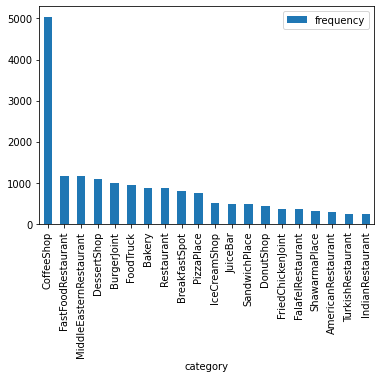

In [ ]:
categories_frequency.index = categories_frequency.category
categories_frequency.sort_values(by='frequency', ascending=False).head(20).plot(kind='bar')
plt.show()

In [ ]:
categories_frequency['mean'] = categories_frequency.frequency/df.shape[0]
categories_frequency.reset_index(drop=True).sort_values(by='mean', ascending=False).head(20)

,category,frequency,mean
1,CoffeeShop,5039,0.260265
9,FastFoodRestaurant,1178,0.060844
4,MiddleEasternRestaurant,1168,0.060327
21,DessertShop,1082,0.055886
10,BurgerJoint,999,0.051599
3,FoodTruck,955,0.049326
15,Bakery,886,0.045762
23,Restaurant,864,0.044626
28,BreakfastSpot,796,0.041114
14,PizzaPlace,747,0.038583


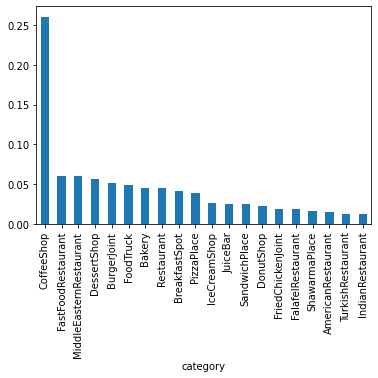

In [ ]:
categories_frequency.index = categories_frequency.category
categories_frequency['mean'].sort_values( ascending=False).head(20).plot(kind='bar')
plt.show()

Coffee shops are the most popular in Riyadh with percentage of 26%.

In [ ]:
#lets check restaurant with Donut Shop category and are actually Dunkin Dounts (which suits coffee shop category)
df[((df['name'].str.contains('Dunkin')) | ((df['name'].str.contains('دانكن')) )) & (df['categories'].str.contains('Donut Shop'))].shape[0]

327

327 of 441 Dount restaurants are Dunkin Dounts. So, the percentage of coffee shops is actually higher than 26%. 


# Question#2: How do restaurants prices vary in different regions of Riyadh?

first we nead to create column for location, Riyadh city can be devided into 76 regions according to 3 streets and one district.

for the north: Northern ring road

South: under Al-Malaz district

West: Western ring road

East: Eastern ring road
    
The lat and lng of these regions are obtained from GoogleMaps. 
The code that's used for plotting is taken from here: https://www.kaggle.com/fahd09/visualize-the-locations-of-each-resturant

In [ ]:
def assign_loc(lng, lat):
    """ This functioan takes the lat and lng of a restaurant and returns the location of it
    -------
    INPUT:
    lng(float): longitude of the restaurant in the map
    lat(float): latitude of the restaurant in the map
    -------
    OUTPUT:
    location(string): the location of restaurant in Riyadh (North, Nortwest, Northeast, South, Center, East, West)"""
    
    sx2, sy2 = 24.665785, 46.784581
    sx1, sy1 = 24.629065, 46.704878
    
    v1 = (sx2-sx1, sy2-sy1)   
    v2 = (sx2-lat, sy2-lng)   
    south_vector = v1[0]*v2[1] - v1[1]*v2[0] 
    
    nx2, ny2 = 24.793839, 46.722511
    nx1, ny1 = 24.762044, 46.645988
    
    v3 = (nx2-nx1, ny2-ny1)  
    v4 = (nx2-lat, ny2-lng)   
    north_vector = v3[0]*v4[1] - v3[1]*v4[0] 
    
    v5 = (nx1-sx1, ny1-sy1)   
    v6 = (nx1-lat, ny1-lng)  
    west_vector = v5[0]*v6[1] - v5[1]*v6[0]
    
    v7 = (nx2-sx2, ny2-sy2)   
    v8 = (nx2-lat, ny2-lng)  
    east_vector = v7[0]*v8[1] - v7[1]*v8[0]
    
    if south_vector <= 0: #below the vector -> south
        loc = 'South'
        
    elif north_vector>=0 :
        if east_vector<=0:
            loc = 'Northeast'
        elif west_vector>=0:
            loc = 'Northwest'
        else:
            loc = 'North'
    else:
        if east_vector<=0:
            loc = 'East'
        elif west_vector>=0:
            loc = 'West'
        else:
            loc = 'Center'
    return loc

In [ ]:
df['location'] = df[['lng','lat']].apply(lambda x: assign_loc(x[0], x[1]),  axis=1)

In [ ]:
df['location'].value_counts()

Center       4102
East         4084
West         3144
South        2925
North        2062
Northwest    1886
Northeast    1158
Name: location, dtype: int64

In [ ]:
# to make sure that locations of restaurants are assigned correctly
p1 = {'lat': 24.719462, 'lon': 46.719108} # all boroghs
df.loc[pd.isnull(df['price']), 'price'] = 'Unknown'
fig = px.scatter_mapbox(df,
                        lat=df['lat'], 
                        lon=df['lng'],  
                        #text=rest_data['location.fullName'],
                        center=p1, 
                        color=df['location'],
                        zoom=9,
                        mapbox_style="open-street-map",
                        title='Riyadh Restaurants (~20K)'
                       )
fig.show()

In [ ]:
# distibution of pricess across Riyadh
p1 = {'lat': 24.719462, 'lon': 46.719108} # all boroghs
df.loc[pd.isnull(df['price']), 'price'] = 'Unknown'
fig = px.scatter_mapbox(df,
                        lat=df['lat'], 
                        lon=df['lng'],  
                        #text=rest_data['location.fullName'],
                        center=p1, 
                        color=df['price'],
                        zoom=9,
                        mapbox_style="open-street-map",
                        title='Riyadh Restaurants (~20K)'
                       )
fig.show()

In [ ]:
df['price'].value_counts()

Cheap             13499
Moderate           3981
Unknown            1515
Expensive           303
Very Expensive       63
Name: price, dtype: int64

In [ ]:
 # create a dictioaty to find the frequency of each price category in a location
list_loc = list(df['location'].drop_duplicates())
list_prices = list(df['price'].drop_duplicates())
temp_list = []
for loc in tqdm(list_loc):
    for price in list_prices:
        temp_list.append([loc, price, df[(df['location']==loc) & (df['price']==price)].shape[0],df[(df['location']==loc) & (df['price']==price)].shape[0]/df[(df['location']==loc)].shape[0]])


df_loc_price = pd.DataFrame(temp_list)

df_loc_price.columns = ["location", "price","frequency", "percentage"]
    

100%|██████████| 7/7 [00:00<00:00, 17.99it/s]


In [ ]:
df_loc_price

,location,price,frequency,percentage
0,South,Moderate,670,0.229060
1,South,Cheap,1984,0.678291
2,South,Unknown,235,0.080342
3,South,Expensive,32,0.010940
4,South,Very Expensive,4,0.001368
5,West,Moderate,664,0.211196
6,West,Cheap,2172,0.690840
7,West,Unknown,243,0.077290
8,West,Expensive,56,0.017812
9,West,Very Expensive,9,0.002863


Text(0, 0.5, 'percentage')

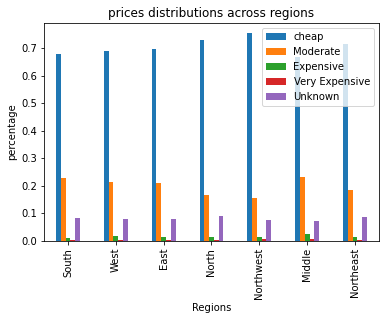

In [ ]:
plotdata = pd.DataFrame({
    "cheap":df_loc_price[df_loc_price['price']=='Cheap']['percentage'].to_list(),
    "Moderate":df_loc_price[df_loc_price['price']=='Moderate']['percentage'].to_list(),
    "Expensive":df_loc_price[df_loc_price['price']=='Expensive']['percentage'].to_list(),
    "Very Expensive":df_loc_price[df_loc_price['price']=='Very Expensive']['percentage'].to_list(),
    "Unknown":df_loc_price[df_loc_price['price']=='Unknown']['percentage'].to_list()
    }, 
    index=["South", "West", "East", "North", "Northwest", "Middle", "Northeast"]
)
plotdata.plot(kind="bar")
plt.title("prices distributions across regions")
plt.xlabel("Regions")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

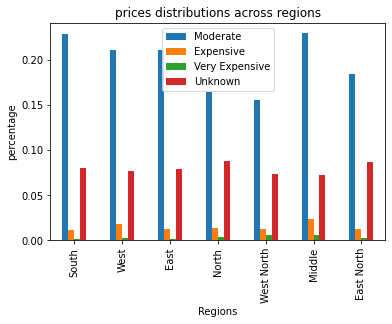

In [ ]:
plotdata = pd.DataFrame({
    "Moderate":df_loc_price[df_loc_price['price']=='Moderate']['percentage'].to_list(),
    "Expensive":df_loc_price[df_loc_price['price']=='Expensive']['percentage'].to_list(),
    "Very Expensive":df_loc_price[df_loc_price['price']=='Very Expensive']['percentage'].to_list(),
    "Unknown":df_loc_price[df_loc_price['price']=='Unknown']['percentage'].to_list()
    }, 
    index=["South", "West", "East", "North", "West North", "Middle", "East North"]
)
plotdata.plot(kind="bar")
plt.title("prices distributions across regions")
plt.xlabel("Regions")
plt.ylabel("percentage")

Text(0, 0.5, 'percentage')

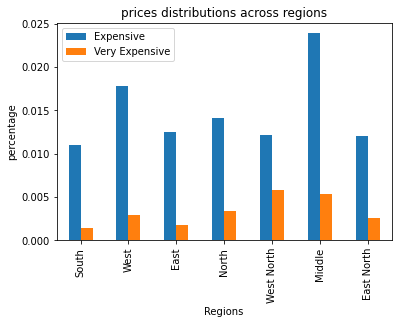

In [ ]:
plotdata = pd.DataFrame({
    "Expensive":df_loc_price[df_loc_price['price']=='Expensive']['percentage'].to_list(),
    "Very Expensive":df_loc_price[df_loc_price['price']=='Very Expensive']['percentage'].to_list(),
    }, 
    index=["South", "West", "East", "North", "West North", "Middle", "East North"]
)
plotdata.plot(kind="bar")
plt.title("prices distributions across regions")
plt.xlabel("Regions")
plt.ylabel("percentage")

In [ ]:
df_loc_price[df_loc_price['price']=='Cheap'].sort_values(by=['percentage'], ascending=False)

,location,price,frequency,percentage
21,Northwest,Cheap,1420,0.752916
16,North,Cheap,1507,0.730844
31,Northeast,Cheap,828,0.715026
11,East,Cheap,2844,0.696376
6,West,Cheap,2172,0.690840
1,South,Cheap,1984,0.678291
26,Center,Cheap,2744,0.668942


In [ ]:
df_loc_price[df_loc_price['price']=='Moderate'].sort_values(by=['percentage'], ascending=False)

,location,price,frequency,percentage
25,Center,Moderate,941,0.229400
0,South,Moderate,670,0.229060
5,West,Moderate,664,0.211196
10,East,Moderate,861,0.210823
30,Northeast,Moderate,213,0.183938
15,North,Moderate,338,0.163919
20,Northwest,Moderate,294,0.155885


In [ ]:
df_loc_price[df_loc_price['price']=='Expensive'].sort_values(by=['percentage'], ascending=False)

,location,price,frequency,percentage
28,Center,Expensive,98,0.023891
8,West,Expensive,56,0.017812
18,North,Expensive,29,0.014064
13,East,Expensive,51,0.012488
23,Northwest,Expensive,23,0.012195
33,Northeast,Expensive,14,0.012090
3,South,Expensive,32,0.010940


In [ ]:
df_loc_price[df_loc_price['price']=='Very Expensive'].sort_values(by=['percentage'], ascending=False)

,location,price,frequency,percentage
24,Northwest,Very Expensive,11,0.005832
29,Center,Very Expensive,22,0.005363
19,North,Very Expensive,7,0.003395
9,West,Very Expensive,9,0.002863
34,Northeast,Very Expensive,3,0.002591
14,East,Very Expensive,7,0.001714
4,South,Very Expensive,4,0.001368


from the tables above, we can find that:



1.   Most of Riyadh's restaurants are cheap.
2.   The northern regions have the highest percentage of cheap restaurants.
3.   The central region has the most expensive restaurants.
4.   The southern region has the least expensive restaurants.

# Question#3: What's the most correlated variable to restaurant rating?

In [ ]:
# remove null values from the df and the restaurant that has less than 3 rating signals
df_price_dummies = pd.get_dummies(df[(~df['rating'].isna()) & (df['ratingSignals']> 2)], columns=['price', 'location']).drop(columns=['name', 'categories', 'address', 'lat', 'lng'])

In [ ]:
df_price_dummies

,likes,photos,tips,rating,ratingSignals,price_Cheap,price_Expensive,price_Moderate,price_Unknown,price_Very Expensive,location_Center,location_East,location_North,location_Northeast,location_Northwest,location_South,location_West
4,29.0,90,1,8.9,32.0,1,0,0,0,0,0,0,0,0,0,0,1
5,22.0,13,2,8.6,24.0,1,0,0,0,0,0,0,0,0,0,0,1
6,24.0,27,1,7.3,33.0,1,0,0,0,0,0,0,0,0,0,0,1
15,8.0,10,6,7.8,9.0,0,0,1,0,0,0,0,0,0,0,1,0
35,2.0,12,1,6.3,7.0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350,8.0,31,6,5.3,22.0,1,0,0,0,0,0,0,0,1,0,0,0
19353,5.0,6,2,7.5,8.0,1,0,0,0,0,0,0,0,1,0,0,0
19354,7.0,15,8,5.1,19.0,1,0,0,0,0,0,0,0,1,0,0,0
19359,11.0,14,2,6.1,17.0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
corr_matrix = df_price_dummies.corr()
corr_matrix

,likes,photos,tips,rating,ratingSignals,price_Cheap,price_Expensive,price_Moderate,price_Unknown,price_Very Expensive,location_Center,location_East,location_North,location_Northeast,location_Northwest,location_South,location_West
likes,1.000000,0.785022,0.917472,0.290357,0.989382,-0.122074,0.281501,0.042300,-0.037286,0.066763,0.083059,-0.075292,0.018985,-0.046259,0.040486,-0.096999,0.046746
photos,0.785022,1.000000,0.696025,0.240839,0.783763,-0.014664,0.124274,-0.020880,-0.025826,0.032385,0.017340,-0.076499,0.018840,-0.030932,0.086925,-0.082574,0.066206
tips,0.917472,0.696025,1.000000,0.236388,0.944601,-0.166047,0.314522,0.074826,-0.035615,0.088758,0.110251,-0.089421,0.031034,-0.058165,0.037384,-0.104672,0.035844
rating,0.290357,0.240839,0.236388,1.000000,0.274035,0.119224,0.024223,-0.101259,-0.072165,0.006363,-0.006957,-0.031844,0.018294,-0.032902,0.070081,-0.037583,0.022350
ratingSignals,0.989382,0.783763,0.944601,0.274035,1.000000,-0.134959,0.294497,0.052342,-0.039146,0.071573,0.091083,-0.081515,0.022152,-0.048975,0.042912,-0.101926,0.045190
price_Cheap,-0.122074,-0.014664,-0.166047,0.119224,-0.134959,1.000000,-0.243774,-0.763465,-0.420287,-0.112737,-0.056609,0.024696,0.033296,0.007735,0.015360,0.009370,-0.015638
price_Expensive,0.281501,0.124274,0.314522,0.024223,0.294497,-0.243774,1.000000,-0.078863,-0.043414,-0.011645,0.056212,-0.037394,-0.004823,-0.016289,-0.008174,-0.025694,0.018101
price_Moderate,0.042300,-0.020880,0.074826,-0.101259,0.052342,-0.763465,-0.078863,1.000000,-0.135966,-0.036471,0.045313,-0.019519,-0.034500,-0.011436,-0.021264,0.009272,0.015652
price_Unknown,-0.037286,-0.025826,-0.035615,-0.072165,-0.039146,-0.420287,-0.043414,-0.135966,1.000000,-0.020077,-0.011408,0.017168,-0.002877,0.012283,0.007474,-0.011658,-0.006895
price_Very Expensive,0.066763,0.032385,0.088758,0.006363,0.071573,-0.112737,-0.011645,-0.036471,-0.020077,1.000000,0.027754,-0.028686,0.000071,0.005702,0.011159,-0.014174,-0.001850


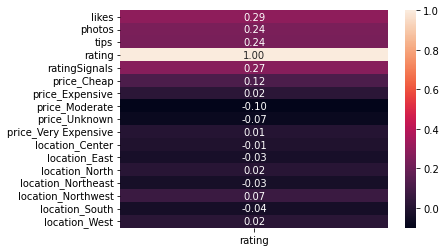

In [ ]:
x = corr_matrix[['rating']]
sns.heatmap(x, annot=True, fmt=".2f");

From the heatmap, we can see that likes, tips, photos and rating signal are the most correlated variables with rating. This shows the more the poeple instact with the restaurant page in foursquare.com the highr the rating is.

: